In [59]:
""" 
Imports
"""
import glob
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [60]:
start_time = datetime(2024, 8, 1, 0, 0)
end_time = datetime(2024, 10, 7, 0, 0)
test_end_time = datetime(2024, 11, 14, 6, 0)
increment = timedelta(hours=1)

data_path = './crypto_data.csv'
df = pd.read_csv(data_path)
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df = df.loc[start_time : end_time]

In [62]:
# Find stocks correlated with TIAPERP
closeDf = df.filter(regex='_close$').sort_index(ascending=True)
logReturnsDf = np.log(closeDf / closeDf.shift(1))
logReturnsDf = logReturnsDf.dropna(how='all', axis=0)
logReturnsDf = logReturnsDf.dropna(how='any', axis=1)
logReturnsDf = logReturnsDf.rename(columns={col: f'{col}_lreturn' for col in logReturnsDf.columns})
logReturnsDf.head()

corrs = logReturnsDf.corrwith(logReturnsDf['TIAPERP_close_lreturn']).sort_values(ascending=False)
corrs

TIAPERP_close_lreturn      1.000000
TIAUSDT_close_lreturn      0.926740
SANDUSDT_close_lreturn     0.657460
MANAUSDT_close_lreturn     0.655200
MANTAUSDT_close_lreturn    0.654102
                             ...   
ZKJUSDT_close_lreturn      0.210553
GFTUSDT_close_lreturn      0.179233
DOP1USDT_close_lreturn     0.170925
PAXGUSDT_close_lreturn     0.166203
USDCUSDT_close_lreturn    -0.010386
Length: 403, dtype: float64

In [63]:
# Stocks chosen
stocks = ['TIAPERP', 'MNTPERP', 'ONDOPERP', 'ETCPERP', 'ARBPERP']
filteredCols = [col for col in df.columns if any([(stock in col) for stock in stocks])]
chosenDf = df.loc[:,filteredCols]

In [64]:
# Check na and get rid of 0s
chosenDf.isna().sum().sort_values(ascending=False).head(20)
chosenDf.describe().T

# mins = chosenDf[chosenDf != 0].min()
# chosenDf = chosenDf.replace(to_replace=0, value=mins)
# chosenDf.describe().T

,count,mean,std,min,25%,50%,75%,max
TIAPERP_open,1609.0,5.123527,0.685482,3.74700,4.56400,5.12000,5.65300,6.65500
TIAPERP_high,1609.0,5.172042,0.693717,3.85100,4.59100,5.16200,5.70200,6.84800
TIAPERP_low,1609.0,5.074645,0.680278,3.66000,4.51300,5.08200,5.59900,6.57300
TIAPERP_close,1609.0,5.123668,0.685556,3.74700,4.56400,5.12000,5.65300,6.65500
TIAPERP_volume,1609.0,2237.130945,4242.545606,0.00000,273.45000,875.42000,2426.35000,46293.96000
TIAPERP_turnover,1609.0,11826.583860,23087.028450,0.00000,1346.38913,4444.55938,12805.73188,283791.53897
ETCPERP_open,1609.0,18.872669,0.907758,15.98000,18.29000,18.73500,19.37000,21.92000
ETCPERP_high,1609.0,18.937383,0.906722,16.37000,18.35500,18.79500,19.43500,21.92500
ETCPERP_low,1609.0,18.797983,0.910294,15.63000,18.20500,18.68000,19.30500,21.79500
ETCPERP_close,1609.0,18.870814,0.904571,15.98000,18.29000,18.73500,19.37000,21.87000


In [65]:
for dataType in ['close', 'turnover']:
    lags = [1,2,3,4,7]

    # Log Returns
    for stock in stocks:
        for lag in lags:
            chosenDf[f'{stock}_logReturn_{dataType}_{lag}'] = np.log(chosenDf[f'{stock}_{dataType}'] / chosenDf[f'{stock}_{dataType}'].shift(lag))

    # Moving average
    for stock in stocks:
        for lag in lags:
            chosenDf[f'{stock}_movingAverage_{dataType}_{lag}'] = chosenDf[f'{stock}_{dataType}'].rolling(lag).mean()

    # Z Score
    for stock in stocks:
        for lag in lags:
            if lag == 1: continue
            chosenDf[f'{stock}_zscore_{dataType}_{lag}'] = (chosenDf[f'{stock}_{dataType}'] - chosenDf[f'{stock}_movingAverage_{dataType}_{lag}'])/chosenDf[f'{stock}_{dataType}'].rolling(lag).std()
            chosenDf[f'{stock}_zscore_{dataType}_{lag}'] = chosenDf[f'{stock}_zscore_{dataType}_{lag}'].fillna(0)

display(chosenDf.isna().sum().sort_values(ascending=False).head(20))
featuredDf = chosenDf.dropna(how='any', axis=0)
featuredDf = featuredDf.replace([np.inf, -np.inf], 0)
featuredDf.head()

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  r

MNTPERP_logReturn_turnover_4         12
MNTPERP_logReturn_turnover_7         11
MNTPERP_logReturn_turnover_2          9
MNTPERP_logReturn_turnover_1          9
MNTPERP_logReturn_turnover_3          8
ONDOPERP_logReturn_turnover_7         7
ETCPERP_logReturn_close_7             7
TIAPERP_logReturn_close_7             7
ETCPERP_logReturn_turnover_7          7
MNTPERP_logReturn_close_7             7
ONDOPERP_logReturn_close_7            7
TIAPERP_logReturn_turnover_7          7
ARBPERP_logReturn_turnover_7          7
ARBPERP_logReturn_close_7             7
ETCPERP_movingAverage_close_7         6
ONDOPERP_movingAverage_close_7        6
ARBPERP_movingAverage_close_7         6
MNTPERP_movingAverage_turnover_7      6
TIAPERP_movingAverage_close_7         6
ONDOPERP_movingAverage_turnover_7     6
dtype: int64

,TIAPERP_open,TIAPERP_high,TIAPERP_low,TIAPERP_close,TIAPERP_volume,TIAPERP_turnover,ETCPERP_open,ETCPERP_high,ETCPERP_low,ETCPERP_close,...,ONDOPERP_zscore_turnover_4,ONDOPERP_zscore_turnover_7,ETCPERP_zscore_turnover_2,ETCPERP_zscore_turnover_3,ETCPERP_zscore_turnover_4,ETCPERP_zscore_turnover_7,ARBPERP_zscore_turnover_2,ARBPERP_zscore_turnover_3,ARBPERP_zscore_turnover_4,ARBPERP_zscore_turnover_7
time,,,,,,,,,,,,,,,,,,,,,
2024-08-01 07:00:00,5.305,5.350,5.287,5.350,1638.92,8686.75076,21.760,21.830,21.725,21.815,...,1.231892,0.203959,-0.707107,0.273447,-0.217334,0.416943,-0.707107,-0.606632,-0.755745,-0.954368
2024-08-01 08:00:00,5.350,5.388,5.332,5.386,266.03,1424.89480,21.815,21.925,21.795,21.870,...,-0.744237,-0.545404,0.707107,0.999937,0.974695,0.832905,0.707107,1.153228,0.386016,-0.469453
2024-08-01 09:00:00,5.386,5.386,5.304,5.329,327.18,1744.59138,21.870,21.870,21.730,21.755,...,-1.222068,-1.430058,-0.707107,-1.059170,-1.388193,-0.831613,0.707107,1.146669,1.488764,1.487354
2024-08-01 10:00:00,5.329,5.329,5.200,5.200,653.62,3427.67035,21.755,21.755,21.370,21.370,...,1.469441,2.217624,0.707107,-0.403663,-0.596485,-0.789036,0.707107,1.133478,1.465509,2.215305
2024-08-01 11:00:00,5.200,5.312,5.141,5.255,1662.44,8653.59540,21.370,21.370,21.170,21.310,...,1.250274,1.936776,0.707107,1.151511,1.343119,1.958401,0.707107,1.146034,1.483703,2.238517


In [87]:
# Prediction with LR
Y = featuredDf['TIAPERP_logReturn_close_1'].shift(-1).dropna()
X = featuredDf.drop(labels=featuredDf.index[-1], axis=0)


import statsmodels.api as sm

model = sm.OLS(Y, X).fit()
print(model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     TIAPERP_logReturn_close_1   R-squared (uncentered):                   0.147
Model:                                   OLS   Adj. R-squared (uncentered):              0.054
Method:                        Least Squares   F-statistic:                              1.577
Date:                       Mon, 18 Nov 2024   Prob (F-statistic):                    2.27e-05
Time:                               19:57:18   Log-Likelihood:                          4649.2
No. Observations:                       1572   AIC:                                     -8988.
Df Residuals:                           1417   BIC:                                     -8158.
Df Model:                                155                                                  
Covariance Type:                   nonrobust                                                  
                                        coef    st

In [ ]:
predictions = model.predict(X)
# sns.scatterplot(predictions, Y)

upPredict = (predictions > 0).sum()
downPredict = (predictions < 0).sum()

upCorrect = ((predictions > 0) & (Y > 0)).sum()
downCorrect = ((predictions < 0) & (Y < 0)).sum()

upCorrect/upPredict, downCorrect/downPredict

(0.5389527458492975, 0.5918884664131813)

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='time'>

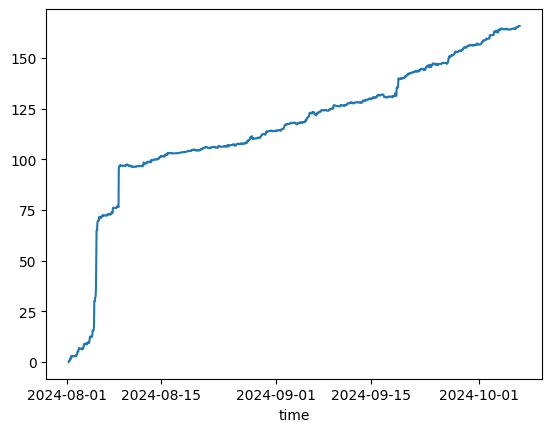

In [102]:
price = featuredDf['TIAPERP_close']
pnl = (price.shift(-1)-price)*predictions/np.std(predictions) * 20/price

sns.lineplot(featuredDf.index, np.cumsum(pnl))